In [1]:
%matplotlib inline
import os 
import os.path as osp

import numpy as np
import matplotlib.pylab as plt
import pandas as pd 

from marl.utils import tb_utils

2022-12-08 07:53:02.858130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mxsmith/.conda/envs/model38/lib


In [2]:
BR_PATH = "/scratch/wellman_root/wellman1/mxsmith/results/marl/one_step_transfer/2022_12_06_br_random_with_memory/wid_10/"
MODEL_PATH = "/scratch/wellman_root/wellman1/mxsmith/results/marl/gathering/one_step_transfer/train_world_model/"
TRANSFER_PATH = "/scratch/wellman_root/wellman1/mxsmith/results/marl/one_step_transfer/2022_11_30_one_step_transfer"
BASELINE_PATH = "/scratch/wellman_root/wellman1/mxsmith/results/marl/one_step_transfer/2022_12_07_br_br_baseline_sweep_fixed/wid_16/"

## Best Response to Random

### Learner

In [3]:
df = tb_utils.events_to_dataframe(osp.join(BR_PATH, "learner"))
print(df.columns)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Index(['batch_size', 'critic_explained_variance', 'critic_loss',
       'entropy_loss', 'kl_vs_target', 'learner_frame', 'learner_step', 'loss',
       'param_norm', 'param_updates_norm', 'policy_kl_convergence',
       'policy_loss', 'policy_most_likely_action', 'replay/priority',
       'replay/probability', 'replay/table_size', 'replay/times_sampled',
       'scaled_critic_loss', 'scaled_entropy_loss', 'value', 'step',
       'wall_time'],
      dtype='object', name='name')


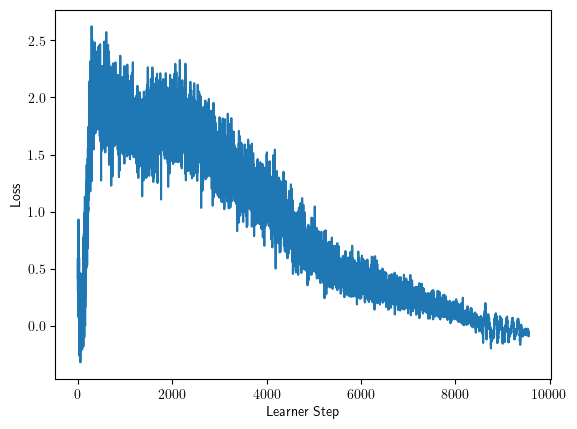

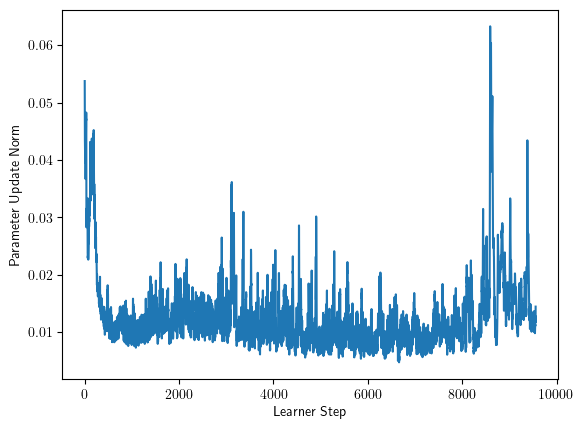

In [4]:
fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["loss"])
axes.set_ylabel("Loss")
axes.set_xlabel("Learner Step")

plt.show()


fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["param_updates_norm"])
axes.set_ylabel("Parameter Update Norm")
axes.set_xlabel("Learner Step")

plt.show()

### Training Arenas

In [5]:
train_dfs = []
for i in range(4):
    train_dfs.append(tb_utils.events_to_dataframe(osp.join(BR_PATH, f"train_arena_{i}")))
print(train_dfs[0].columns)

Index(['actions_per_second', 'episode_length', 'episodes_per_second',
       'learner_step', 'steps_per_second', 'train_return_per_episode/0',
       'train_return_per_episode/1', 'transitions_per_second',
       'updates_per_second', 'step', 'wall_time'],
      dtype='object', name='name')


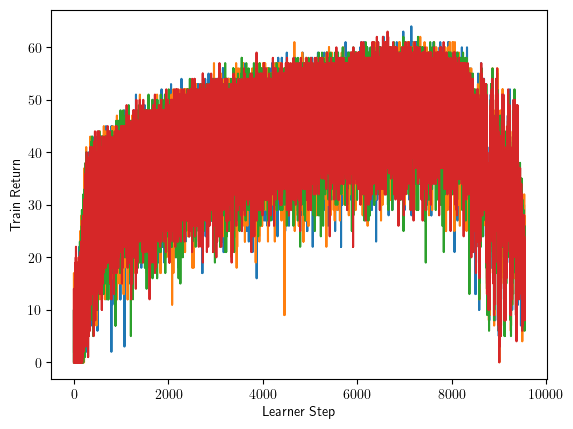

In [6]:
fig, axes = plt.subplots()

for i in range(4):
    axes.plot(train_dfs[i]["learner_step"], train_dfs[i]["train_return_per_episode/0"])

axes.set_ylabel("Train Return")
axes.set_xlabel("Learner Step")    
    
plt.show()

### Eval Arena

In [8]:
eval_df = tb_utils.events_to_dataframe(osp.join(BR_PATH, "eval_arena"))
print(eval_df.columns)

Index(['episode_length', 'eval_return/0', 'eval_return/1', 'learner_step',
       'step', 'wall_time'],
      dtype='object', name='name')


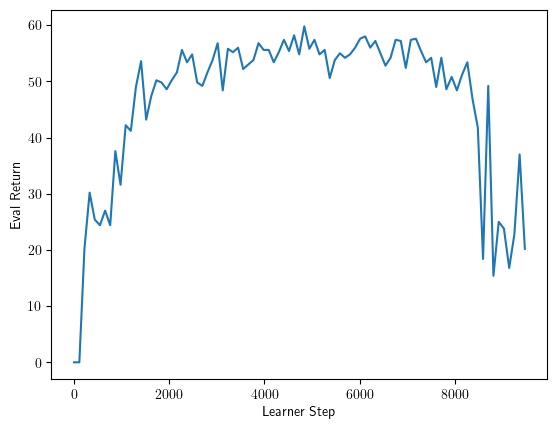

In [9]:
fig, axes = plt.subplots()

axes.plot(eval_df["learner_step"], eval_df["eval_return/0"])
axes.set_ylabel("Eval Return")
axes.set_xlabel("Learner Step")

plt.show()

## Baseline BR(BR)

### Learner

In [10]:
df = tb_utils.events_to_dataframe(osp.join(BASELINE_PATH, "learner"))
print(df.columns)

Index(['batch_size', 'critic_explained_variance', 'critic_loss',
       'entropy_loss', 'kl_vs_target', 'learner_frame', 'learner_step', 'loss',
       'param_norm', 'param_updates_norm', 'policy_kl_convergence',
       'policy_loss', 'policy_most_likely_action', 'replay/priority',
       'replay/probability', 'replay/table_size', 'replay/times_sampled',
       'scaled_critic_loss', 'scaled_entropy_loss', 'value', 'step',
       'wall_time'],
      dtype='object', name='name')


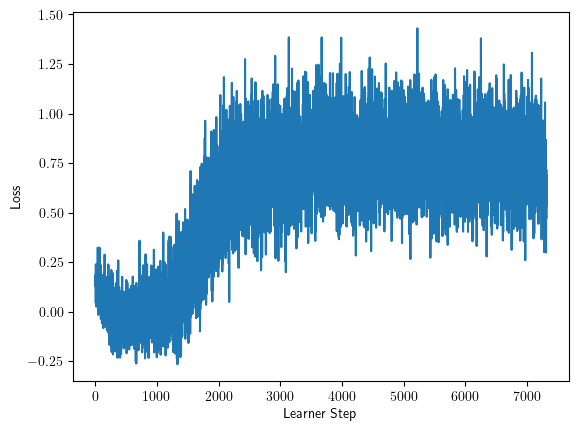

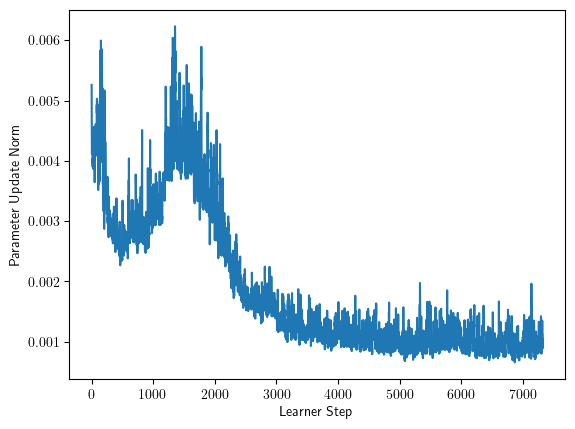

In [11]:
fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["loss"])
axes.set_ylabel("Loss")
axes.set_xlabel("Learner Step")

plt.show()


fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["param_updates_norm"])
axes.set_ylabel("Parameter Update Norm")
axes.set_xlabel("Learner Step")

plt.show()

### Training Arenas

In [12]:
train_dfs = []
for i in range(4):
    train_dfs.append(tb_utils.events_to_dataframe(osp.join(BASELINE_PATH, f"train_arena_{i}")))
print(train_dfs[0].columns)

Index(['actions_per_second', 'episode_length', 'episodes_per_second',
       'learner_step', 'steps_per_second', 'train_return_per_episode/0',
       'train_return_per_episode/1', 'transitions_per_second',
       'updates_per_second', 'step', 'wall_time'],
      dtype='object', name='name')


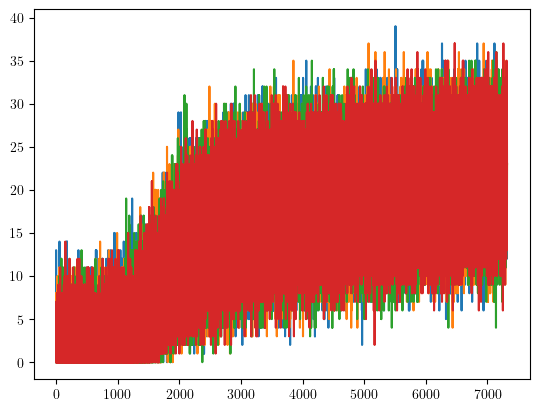

In [13]:
fig, axes = plt.subplots()

for i in range(4):
    axes.plot(train_dfs[i]["learner_step"], train_dfs[i]["train_return_per_episode/0"])

plt.show()

### Eval Arena

In [15]:
eval_df = tb_utils.events_to_dataframe(osp.join(BASELINE_PATH, "eval_arena"))
print(eval_df.columns)

Index(['episode_length', 'eval_return/0', 'eval_return/1', 'learner_step',
       'step', 'wall_time'],
      dtype='object', name='name')


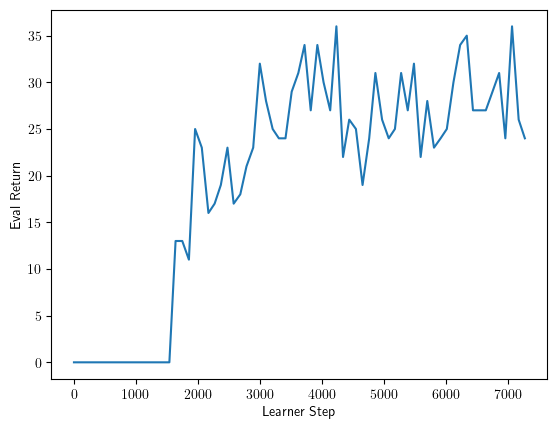

In [16]:
fig, axes = plt.subplots()

axes.plot(eval_df["learner_step"], eval_df["eval_return/0"])
axes.set_ylabel("Eval Return")
axes.set_xlabel("Learner Step")

plt.show()

## World Model

In [14]:
df = tb_utils.events_to_dataframe(osp.join(MODEL_PATH, "learner"))
print(df.columns)

Index(['accuracy', 'count/0', 'count/1', 'count/2', 'count/3', 'count/4',
       'learner_step', 'loss', 'observation_loss', 'observation_loss/0',
       'observation_loss/1', 'param_norm', 'param_updates_norm', 'precision/0',
       'precision/1', 'precision/2', 'precision/3', 'precision/4',
       'reward_loss', 'reward_loss/0', 'reward_loss/1', 'scaled_reward_loss',
       'step', 'wall_time'],
      dtype='object', name='name')


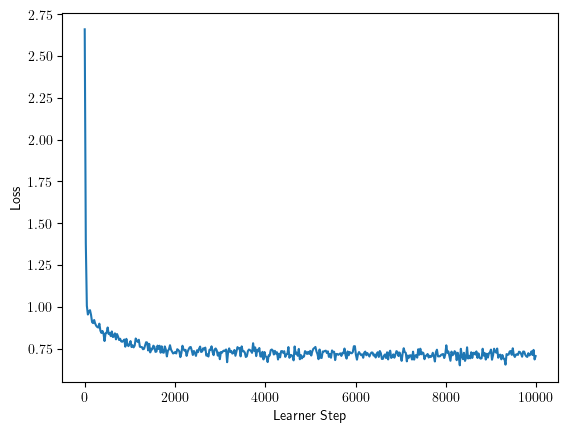

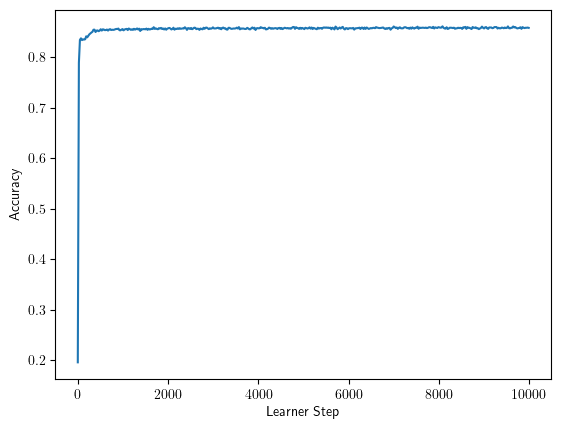

In [15]:
fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["loss"])
axes.set_ylabel("Loss")
axes.set_xlabel("Learner Step")

plt.show()


fig, axes = plt.subplots()

axes.plot(df["learner_step"], df["accuracy"])
axes.set_ylabel("Accuracy")
axes.set_xlabel("Learner Step")

plt.show()

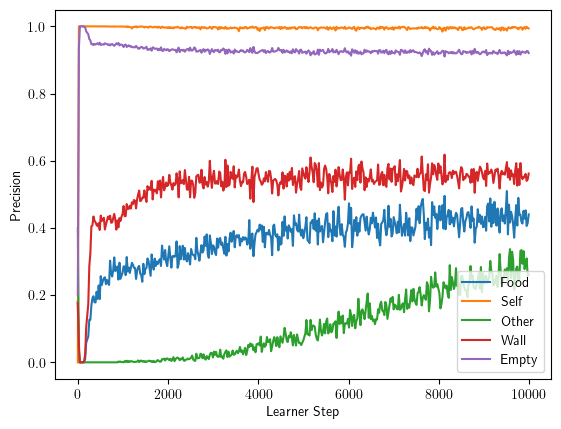

In [20]:
fig, axes = plt.subplots()
labels = ["Food", "Self", "Other", "Wall", "Empty"]

axes.set_ylabel("Precision")
axes.set_xlabel("Learner Step")

for i in range(5):
    axes.plot(df["learner_step"], df[f"precision/{i}"], label=labels[i])

plt.legend()
plt.show()

## Transfer

### Planning Arenas

In [44]:
plan_dfs = []
for i in range(4):
    plan_dfs.append(tb_utils.events_to_dataframe(osp.join(TRANSFER_PATH, f"plan_arena_{i}")))
print(plan_dfs[0].columns)

KeyError: "None of [Index(['wall_time', 'name', 'step', 'value'], dtype='object')] are in the [columns]"

### Training Arenas

In [43]:
train_dfs = []
for i in range(4):
    train_dfs.append(tb_utils.events_to_dataframe(osp.join(TRANSFER_PATH, f"train_arena_{i}")))
print(train_dfs[0].columns)

KeyError: "None of [Index(['wall_time', 'name', 'step', 'value'], dtype='object')] are in the [columns]"

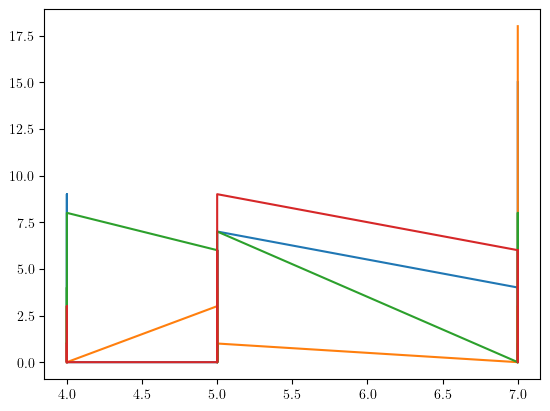

In [24]:
fig, axes = plt.subplots()

for i in range(4):
    axes.plot(train_dfs[i]["learner_step"], train_dfs[i]["train_return_per_episode/0"])

plt.show()